In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\Aeriu\Desktop\StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# I want to create a column containing the composite average score across math, reading, and writing
df['composite'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,composite
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### Do the composite scores differ by gender?

H0 = composite score sample means between male and female students are equal

HA = composite score sample means between male and female students differ

alpha = 0.05

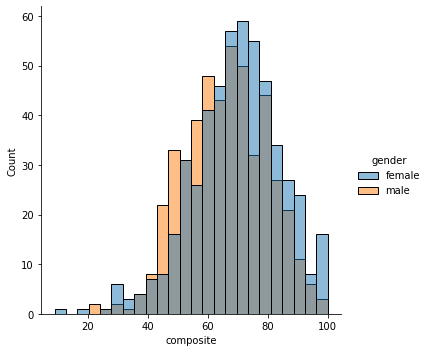

In [8]:
# Checking if normal distribution
sns.displot(data = df, x = 'composite', hue = 'gender')

In [9]:
scipy.stats.levene(df[df['gender'] == 'female']['composite'],
                   df[df['gender'] == 'male']['composite'], center='mean')
# pvalue greater than 0.05 which means sample variance is equal so we will T-test

LeveneResult(statistic=0.15673360418579135, pvalue=0.6922664070086505)

In [10]:
scipy.stats.ttest_ind(df[df['gender'] == 'female']['composite'],
                  df[df['gender'] == 'male']['composite'], equal_var = True)

Ttest_indResult(statistic=4.169913529142, pvalue=3.311973638243664e-05)

pvalue is smaller than 0.05 so we reject the null hypothesis and we know the composite scores statistically differ by gender

### OLS Method

In [11]:
#Encoding the gender column
gendermap = {'female':0,'male':1}
df['gencode'] = df['gender'].map(gendermap)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,composite,gencode
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0
1,female,group C,some college,standard,completed,69,90,88,82.333333,0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1
4,male,group C,some college,standard,none,76,78,75,76.333333,1


In [12]:
X = df['gencode']
y = df['composite']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
# R-squared is low which means the independent variable isn't telling me much about the dependant variable with OLS
# gencode coef is -3.73 which means female students on average have 3.73 lower composite scores than male students

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              composite   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     17.39
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           3.31e-05
Time:                        19:15:41   Log-Likelihood:                -4067.1
No. Observations:                1000   AIC:                             8138.
Df Residuals:                     998   BIC:                             8148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.5695      0.621    111.964      0.000      68.350      70.789
gencode       -3.7320      0.895     -4.170      0.000      -5.488      -1.976
==============================================================================
Omnibus:                       19.457   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.108
Skew:                          -0.330   Prob(JB):                     4.30e-05
Kurtosis:                       3.218   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Does parental level of education affect scores?

In [13]:
dfe = df.groupby('parental level of education').mean().sort_values('composite', ascending = True).reset_index()
dfe

,parental level of education,math score,reading score,writing score,composite,gencode
0,high school,62.137755,64.704082,62.448980,63.096939,0.520408
1,some high school,63.497207,66.938547,64.888268,65.108007,0.491620
2,some college,67.128319,69.460177,68.840708,68.476401,0.477876
3,associate's degree,67.882883,70.927928,69.896396,69.569069,0.477477
4,bachelor's degree,69.389831,73.000000,73.381356,71.923729,0.466102
5,master's degree,69.745763,75.372881,75.677966,73.598870,0.389831


Yes

<AxesSubplot:xlabel='parental level of education', ylabel='composite'>

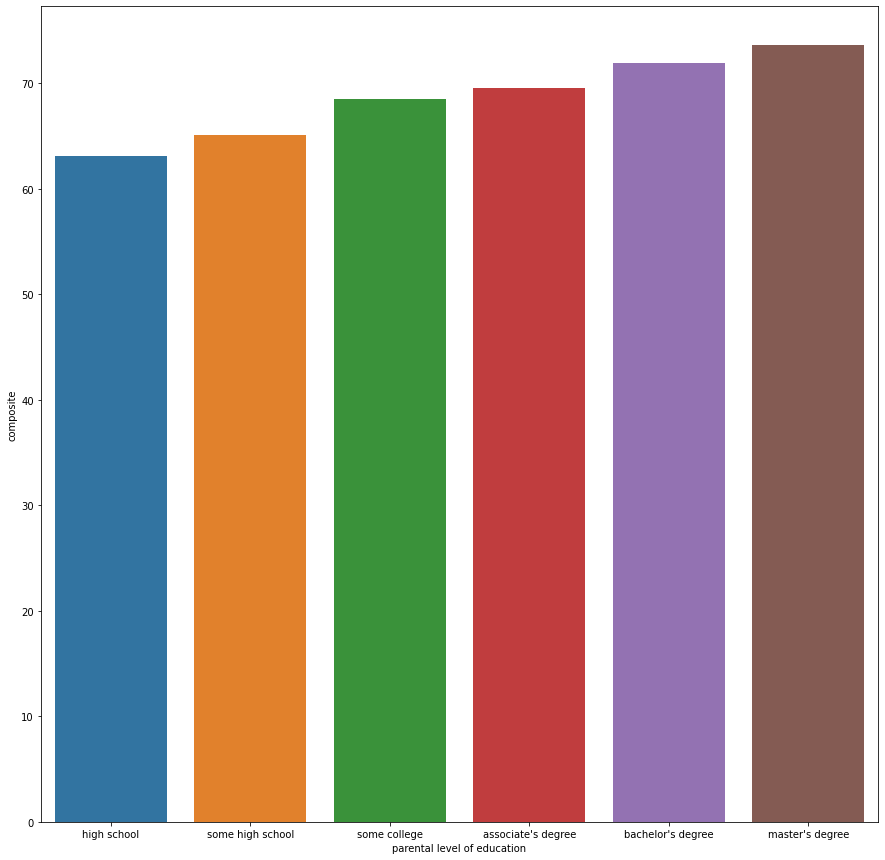

In [14]:
f, ax = plt.subplots(figsize = (15,15))
sns.barplot(data = dfe, x = 'parental level of education', y = 'composite', label = 'Scores by level of Parental education')

### ANOVA Test for parental levels of education and test results

H0 = sample means between groups with different levels of parental education are the same

HA = sample means between groups with different levels of parental education are not the same

alpha = 0.05

In [15]:
X = pd.get_dummies(df['parental level of education'])
y = df['composite']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              composite   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.75
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           4.38e-10
Time:                        19:15:41   Log-Likelihood:                -4049.4
No. Observations:                1000   AIC:                             8111.
Df Residuals:                     994   BIC:                             8140.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 58.8247      0.422    139.368      0.000      57.996      59.653
associate's degree    10.7444      0.895     12.000      0.000       8.987      12.501
bachelor's degree     13.0990      1.162     11.268      0.000      10.818      15.380
high school            4.2722      0.940      4.543      0.000       2.427       6.118
master's degree       14.7742      1.589      9.298      0.000      11.656      17.892
some college           9.6517      0.889     10.854      0.000       7.907      11.397
some high school       6.2833      0.975      6.441      0.000       4.369       8.198
==============================================================================
Omnibus:                       15.494   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.961
Skew:                          -0.309   Prob(JB):                     0.000342
Kurtosis:                       2.993   Cond. No.                     1.02e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The pvalue is 4.38e-10 which is lower than 0.05 which means we reject the null hypothesis and the sample means of test scores between different groups of parental education is not the same

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,composite,gencode
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0
1,female,group C,some college,standard,completed,69,90,88,82.333333,0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1
4,male,group C,some college,standard,none,76,78,75,76.333333,1


### Is there correlation between race/ethnicity and parental level of education?

H0 = Sample means between number of parents in each parental level of education are the same across race/ethnicity

HA = Sample means between number of parents in each parental level of education are not the same across race/ethnicity

alpha = 0.05


In [17]:
#Chi-squared test because these are both categorical variables
table = pd.crosstab(df['race/ethnicity'],df['parental level of education'])
table

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,14,12,18,3,18,24
group B,41,20,48,6,37,38
group C,78,40,64,19,69,49
group D,50,28,44,23,67,50
group E,39,18,22,8,35,18


In [18]:
scipy.stats.chi2_contingency(table)

(29.45866151909779,
 0.07911304840592065,
 20,
 array([[19.758, 10.502, 17.444,  5.251, 20.114, 15.931],
        [42.18 , 22.42 , 37.24 , 11.21 , 42.94 , 34.01 ],
        [70.818, 37.642, 62.524, 18.821, 72.094, 57.101],
        [58.164, 30.916, 51.352, 15.458, 59.212, 46.898],
        [31.08 , 16.52 , 27.44 ,  8.26 , 31.64 , 25.06 ]]))

pvalue is 0.079 which is greater than our alpha value of 0.05 so we do not reject the null hypothesis

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,composite,gencode
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0
1,female,group C,some college,standard,completed,69,90,88,82.333333,0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1
4,male,group C,some college,standard,none,76,78,75,76.333333,1


### What is each student's best subject

In [20]:
df['bestsubject'] = df[['math score','reading score','writing score']].idxmax(axis = 1)
df.head()
df['bestsubject'].replace(' score','',regex = True,inplace = True)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,composite,gencode,bestsubject
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0,writing
1,female,group C,some college,standard,completed,69,90,88,82.333333,0,reading
2,female,group B,master's degree,standard,none,90,95,93,92.666667,0,reading
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1,reading
4,male,group C,some college,standard,none,76,78,75,76.333333,1,reading


### What are the best subjects per race/ethnicity?

In [21]:
table2 = pd.crosstab(df['race/ethnicity'],df['bestsubject']).reset_index()
table2['bestsubject'] = table2[['math','reading','writing']].idxmax(axis = 1)
table2

bestsubject,race/ethnicity,math,reading,writing,bestsubject
0,group A,32,41,16,reading
1,group B,66,81,43,reading
2,group C,92,142,85,reading
3,group D,93,93,76,math
4,group E,71,43,26,math


### Is there a correlation between type of lunch and parental level of education?

H0 = There is no correlation between a parent's level of education and the type of lunch the child receives

H1 = There is a correlation between a parent's level of education and the type of lunch the child receives

alpha = 0.05

In [22]:
table3 = pd.crosstab(df['lunch'],df['parental level of education'])
table3

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
lunch,,,,,,
free/reduced,77,44,70,24,79,61
standard,145,74,126,35,147,118


In [23]:
scipy.stats.chi2_contingency(table3)

(1.1112675079168055,
 0.9531014927218224,
 5,
 array([[ 78.81 ,  41.89 ,  69.58 ,  20.945,  80.23 ,  63.545],
        [143.19 ,  76.11 , 126.42 ,  38.055, 145.77 , 115.455]]))

pvalue is greater than 0.05 so there is a correlation between a parent's level of education and the type of lunch the child receives

In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,composite,gencode,bestsubject
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0,writing
1,female,group C,some college,standard,completed,69,90,88,82.333333,0,reading
2,female,group B,master's degree,standard,none,90,95,93,92.666667,0,reading
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1,reading
4,male,group C,some college,standard,none,76,78,75,76.333333,1,reading


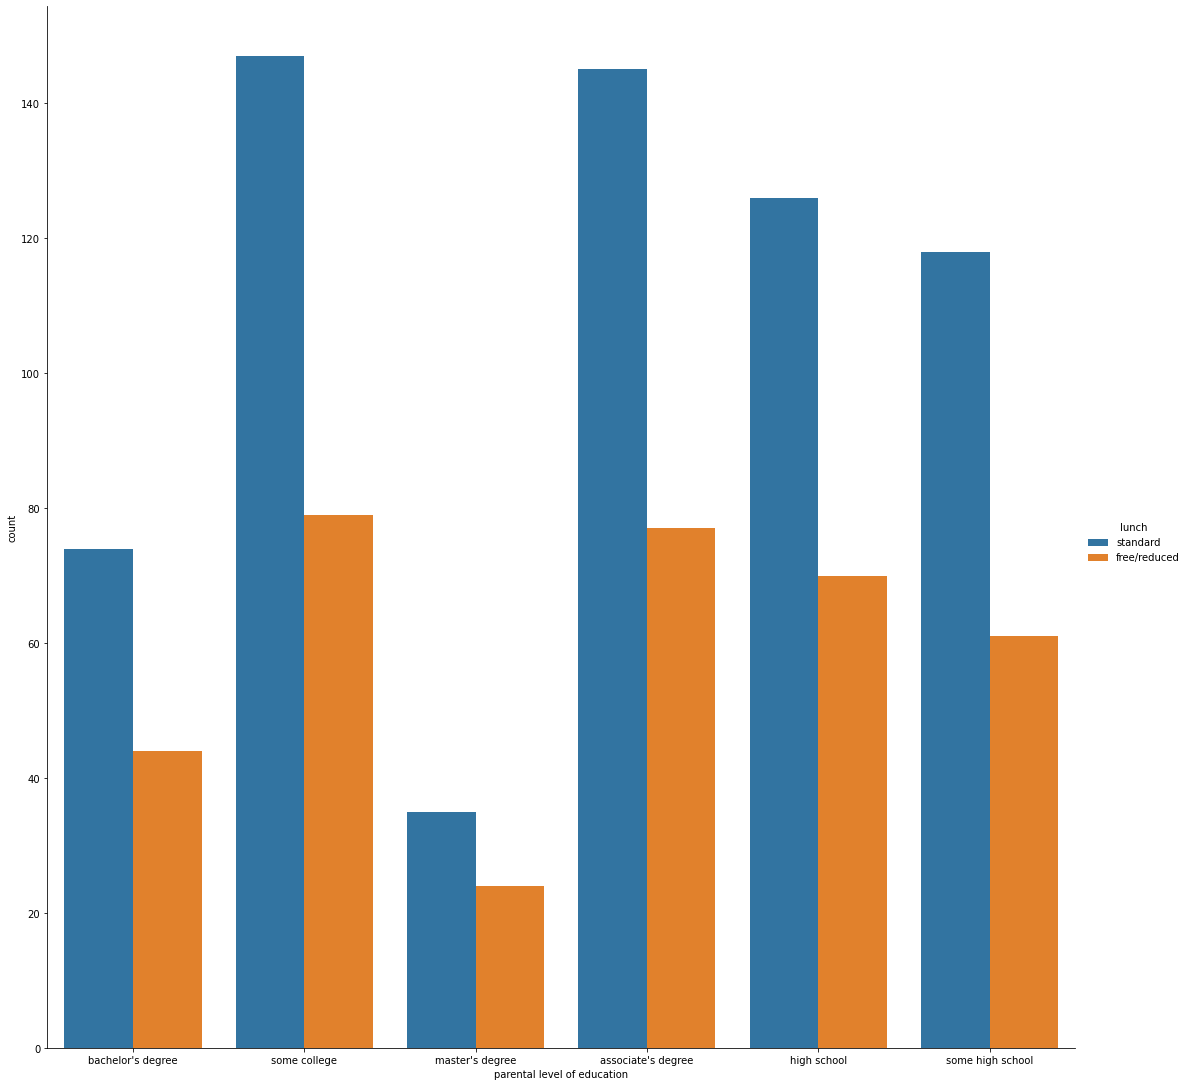

In [25]:
sns.catplot(data = df, x = 'parental level of education', hue = 'lunch',  kind = 'count', height = 15)

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,composite,gencode,bestsubject
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0,writing
1,female,group C,some college,standard,completed,69,90,88,82.333333,0,reading
2,female,group B,master's degree,standard,none,90,95,93,92.666667,0,reading
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1,reading
4,male,group C,some college,standard,none,76,78,75,76.333333,1,reading


## Does test preparation affect composite scores?

In [27]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [28]:
df.groupby('test preparation course').agg({'composite':'mean'}).reset_index()

,test preparation course,composite
0,completed,72.669460
1,none,65.038941


Yes

### Logistic Regression: predicting probability of test preparation course given math, reading, and writing scores

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,composite,gencode,bestsubject
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0,writing
1,female,group C,some college,standard,completed,69,90,88,82.333333,0,reading
2,female,group B,master's degree,standard,none,90,95,93,92.666667,0,reading
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1,reading
4,male,group C,some college,standard,none,76,78,75,76.333333,1,reading


In [30]:
X = df[['math score', 'reading score', 'writing score']]
y = df['test preparation course']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
# don't need feature scaling because units are assumed similar in scoring
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)

In [32]:
yhat_prob = LR.predict_proba(X_test)

### Checking accuracy of model

In [43]:
# Jaccard Score
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label = 'completed')

0.2608695652173913

In [42]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.6322583778533268

In [35]:
# log loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5930204910237353

### Confusion matrix, ROC graph, and precision/recall curves

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
confusion_matrix(y_test,yhat)

array([[ 24,  50],
       [ 18, 108]], dtype=int64)

In [41]:
report = classification_report(y_test,yhat, output_dict = True)
report

{'completed': {'precision': 0.5714285714285714,
  'recall': 0.32432432432432434,
  'f1-score': 0.41379310344827586,
  'support': 74},
 'none': {'precision': 0.6835443037974683,
  'recall': 0.8571428571428571,
  'f1-score': 0.7605633802816901,
  'support': 126},
 'accuracy': 0.66,
 'macro avg': {'precision': 0.6274864376130198,
  'recall': 0.5907335907335907,
  'f1-score': 0.587178241864983,
  'support': 200},
 'weighted avg': {'precision': 0.6420614828209764,
  'recall': 0.66,
  'f1-score': 0.6322583778533268,
  'support': 200}}

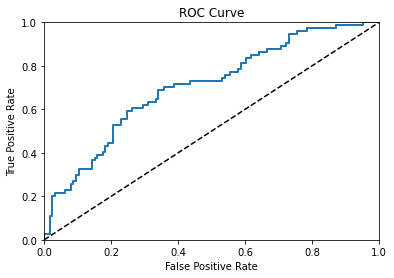

In [39]:
yhatposprob = yhat_prob[:,0]
from sklearn.metrics import precision_recall_curve, roc_curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
plt.subplot(1, 1, 1)
fpr, tpr, thresholds = roc_curve(y_test, yhatposprob, pos_label = 'completed')
plot_roc_curve(fpr, tpr, thresholds)

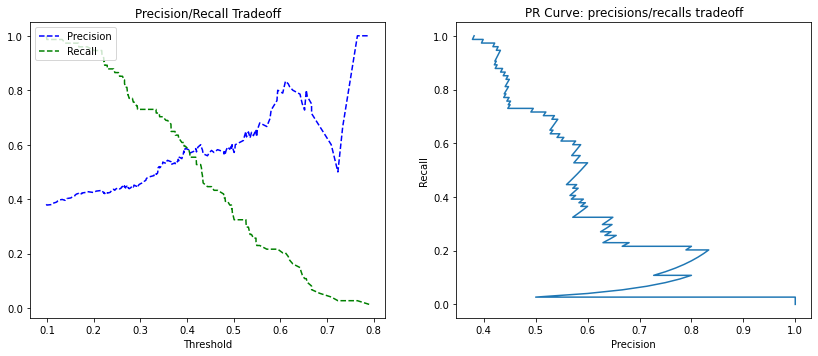

In [40]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
precisions, recalls, thresholds = precision_recall_curve(y_test, yhatposprob, pos_label = 'completed')
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");